In [1]:
import numpy as np
import skfuzzy as fuzz
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train1=pd.read_excel("/home/yash/Work/training/df/UP4years.xlsx","Sheet1")
train1

,Date and Time,UP_DMD
0,2014-01-01 00:00:00,9437.337891
1,2014-01-01 00:15:00,9601.834961
2,2014-01-01 00:30:00,9575.406250
3,2014-01-01 00:45:00,9458.622070
4,2014-01-01 01:00:00,9384.458008
5,2014-01-01 01:15:00,9303.470703
6,2014-01-01 01:30:00,9136.831055
7,2014-01-01 01:45:00,9027.442383
8,2014-01-01 02:00:00,8939.310547
9,2014-01-01 02:15:00,8553.535156


In [3]:
demand_data=np.array(train1.iloc[:,1].values,dtype=float)
demand_data

array([ 9437.33789062,  9601.83496094,  9575.40625   , ...,
       14114.25      , 14364.05664062, 14413.1796875 ])

In [4]:
index=pd.DatetimeIndex(train1.iloc[:,0])
index

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 00:15:00',
               '2014-01-01 00:30:00', '2014-01-01 00:45:00',
               '2014-01-01 01:00:00', '2014-01-01 01:15:00',
               '2014-01-01 01:30:00', '2014-01-01 01:45:00',
               '2014-01-01 02:00:00', '2014-01-01 02:15:00',
               ...
               '2017-03-31 21:30:13', '2017-03-31 21:45:00',
               '2017-03-31 22:00:00', '2017-03-31 22:15:00',
               '2017-03-31 22:30:00', '2017-03-31 22:45:00',
               '2017-03-31 23:00:00', '2017-03-31 23:15:00',
               '2017-03-31 23:30:00', '2017-03-31 23:45:00'],
              dtype='datetime64[ns]', name='Date and Time', length=113856, freq=None)

In [5]:
### Creating a temp dataframe and temp series on which we will perform work so as not to affect orig data
cols=['Demand']
temp_df=pd.DataFrame(demand_data,index,cols)
temp_df

,Demand
Date and Time,
2014-01-01 00:00:00,9437.337891
2014-01-01 00:15:00,9601.834961
2014-01-01 00:30:00,9575.406250
2014-01-01 00:45:00,9458.622070
2014-01-01 01:00:00,9384.458008
2014-01-01 01:15:00,9303.470703
2014-01-01 01:30:00,9136.831055
2014-01-01 01:45:00,9027.442383
2014-01-01 02:00:00,8939.310547


In [6]:
hourly = temp_df.resample('H').max()

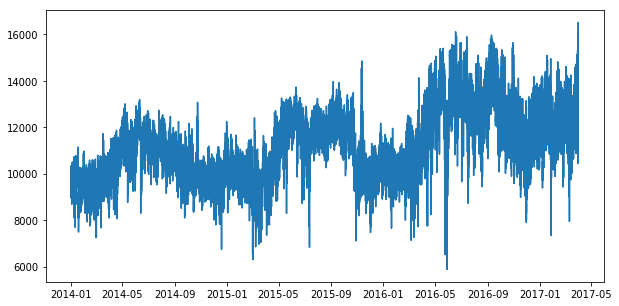

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,5])

df =hourly
ax.plot(df.index,df['Demand'])

data = df['Demand'].iloc[:14232]

In [8]:
from pyFTS.partitioners import Grid

fs = Grid.GridPartitioner(data=data,npart=20,func=mf.trapmf)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

NameError: name 'mf' is not defined

In [38]:
hourly['First Difference']=hourly['Demand']-hourly['Demand'].shift(1)

In [48]:
hourly=hourly[hourly.Demand>8000]
hourly
#df = df[df.line_race != 0]

,Demand,First Difference
Date and Time,,
2014-01-01 00:00:00,9601.834961,NaN
2014-01-01 01:00:00,9384.458008,-217.376953
2014-01-01 02:00:00,8981.492188,-402.965820
2014-01-01 03:00:00,9020.666016,39.173828
2014-01-01 04:00:00,9462.734375,442.068359
2014-01-01 05:00:00,9670.680664,207.946289
2014-01-01 06:00:00,9874.875977,204.195312
2014-01-01 07:00:00,9435.500977,-439.375000
2014-01-01 08:00:00,9801.259766,365.758789


In [41]:
data3 = hourly['First Difference'].iloc[:14230].dropna()
data3

Date and Time
2014-01-01 01:00:00   -217.376953
2014-01-01 02:00:00   -402.965820
2014-01-01 03:00:00     39.173828
2014-01-01 04:00:00    442.068359
2014-01-01 05:00:00    207.946289
2014-01-01 06:00:00    204.195312
2014-01-01 07:00:00   -439.375000
2014-01-01 08:00:00    365.758789
2014-01-01 09:00:00    265.462891
2014-01-01 10:00:00   -231.051758
2014-01-01 11:00:00    516.500977
2014-01-01 12:00:00   -338.875000
2014-01-01 13:00:00    -27.273438
2014-01-01 14:00:00   -930.797852
2014-01-01 15:00:00    274.060547
2014-01-01 16:00:00    -19.323242
2014-01-01 17:00:00    345.891602
2014-01-01 18:00:00    303.324219
2014-01-01 19:00:00    150.966797
2014-01-01 20:00:00   -559.211914
2014-01-01 21:00:00     25.178711
2014-01-01 22:00:00    306.681641
2014-01-01 23:00:00   -177.041992
2014-01-02 00:00:00   -344.629883
2014-01-02 01:00:00   -220.765625
2014-01-02 02:00:00   -161.873047
2014-01-02 03:00:00    -69.652344
2014-01-02 04:00:00    291.688477
2014-01-02 05:00:00     44.870117


In [9]:
from pyFTS.common import Membership as mf


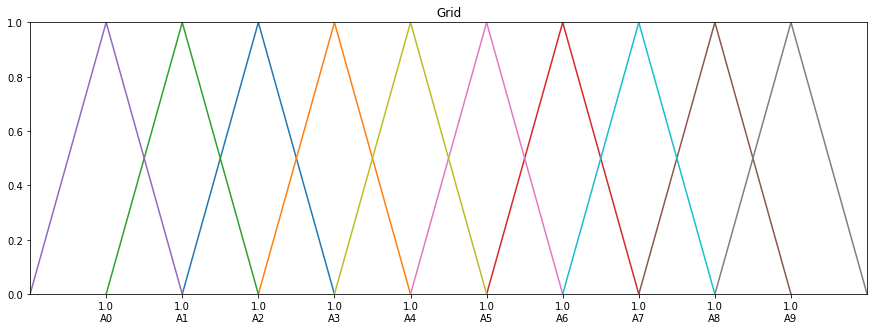

In [30]:
from pyFTS.partitioners import Grid

fs = Grid.GridPartitioner(data=data,npart=10,transformation=tdiff)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

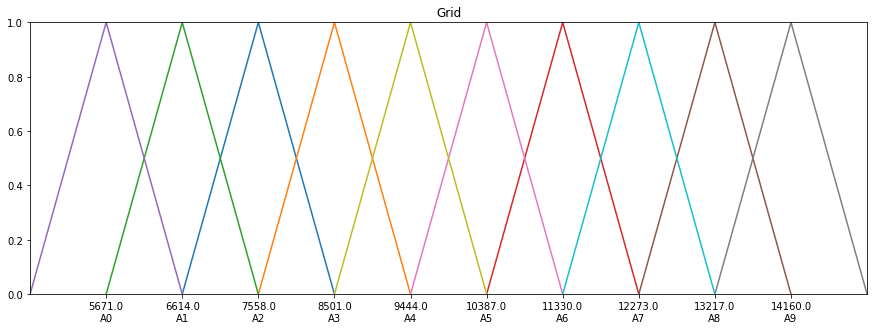

In [36]:
from pyFTS.partitioners import Grid

fs = Grid.GridPartitioner(data=data,npart=10,transformation=tdiff)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

In [10]:
from pyFTS.partitioners import CMeans, Grid, FCM, Huarng, Entropy, Util 


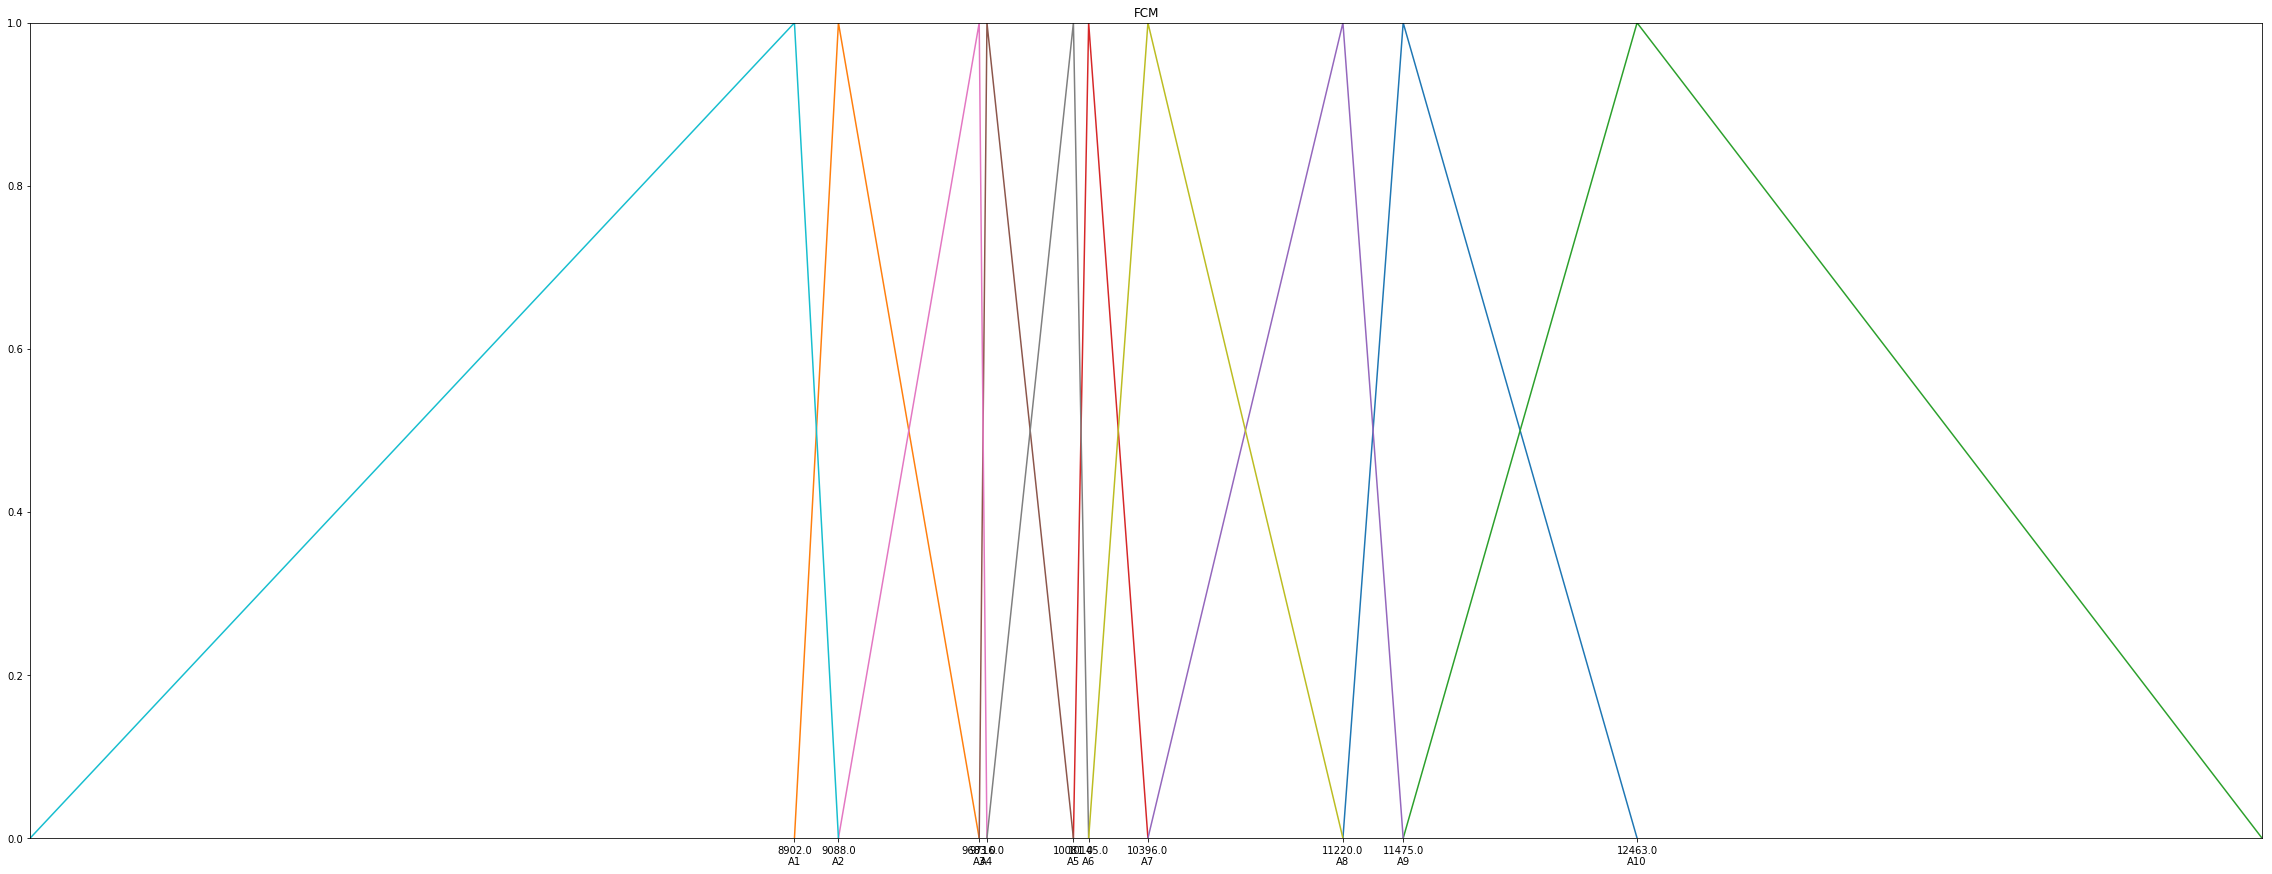

In [12]:
fs = FCM.FCMPartitioner(data=data,npart=10)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[40,15])

fs.plot(ax)

In [49]:
data

Date and Time
2014-01-01 00:00:00     9601.834961
2014-01-01 01:00:00     9384.458008
2014-01-01 02:00:00     8981.492188
2014-01-01 03:00:00     9020.666016
2014-01-01 04:00:00     9462.734375
2014-01-01 05:00:00     9670.680664
2014-01-01 06:00:00     9874.875977
2014-01-01 07:00:00     9435.500977
2014-01-01 08:00:00     9801.259766
2014-01-01 09:00:00    10066.722656
2014-01-01 10:00:00     9835.670898
2014-01-01 11:00:00    10352.171875
2014-01-01 12:00:00    10013.296875
2014-01-01 13:00:00     9986.023438
2014-01-01 14:00:00     9055.225586
2014-01-01 15:00:00     9329.286133
2014-01-01 16:00:00     9309.962891
2014-01-01 17:00:00     9655.854492
2014-01-01 18:00:00     9959.178711
2014-01-01 19:00:00    10110.145508
2014-01-01 20:00:00     9550.933594
2014-01-01 21:00:00     9576.112305
2014-01-01 22:00:00     9882.793945
2014-01-01 23:00:00     9705.751953
2014-01-02 00:00:00     9361.122070
2014-01-02 01:00:00     9140.356445
2014-01-02 02:00:00     8978.483398
2014-01-02 03:

In [13]:
from pyFTS.models import chen

model = chen.ConventionalFTS("Conventional FTS",partitioner=fs)
model.fit(data)
print(model)

[ 01:45:40] Start training
[ 01:45:40] Starting batch 1
[ 01:45:40] Finish batch 1
[ 01:45:40] Starting batch 2
[ 01:45:40] Finish batch 2
[ 01:45:40] Starting batch 3
[ 01:45:40] Finish batch 3
[ 01:45:40] Starting batch 4
[ 01:45:41] Finish batch 4
[ 01:45:41] Starting batch 5
[ 01:45:41] Finish batch 5
[ 01:45:41] Starting batch 6
[ 01:45:41] Finish batch 6
[ 01:45:41] Starting batch 7
[ 01:45:41] Finish batch 7
[ 01:45:41] Starting batch 8
[ 01:45:41] Finish batch 8
[ 01:45:41] Starting batch 9
[ 01:45:42] Finish batch 9
[ 01:45:42] Starting batch 10
[ 01:45:42] Finish batch 10
[ 01:45:42] Starting batch 11
[ 01:45:42] Finish batch 11
[ 01:45:42] Finish training
Conventional FTS:
A1 -> A1,A2,A3,A4,A5,A6,A7,A8
A10 -> A10,A7,A8,A9
A2 -> A1,A2,A3,A4,A5,A6,A7
A3 -> A1,A2,A3,A4,A5,A6,A7,A8,A9
A4 -> A1,A2,A3,A4,A5,A6,A7,A8,A9
A5 -> A1,A2,A3,A4,A5,A6,A7,A8,A9
A6 -> A2,A3,A4,A5,A6,A7,A8,A9
A7 -> A1,A10,A2,A3,A4,A5,A6,A7,A8,A9
A8 -> A10,A2,A3,A4,A5,A6,A7,A8,A9
A9 -> A10,A4,A6,A7,A8,A9



In [21]:
from pyFTS.common import Util as U

U.plot_rules(model, size=[15,5] , rules_by_axis=10)

AttributeError: module 'pyFTS.common.Util' has no attribute 'plot_rules'

In [14]:
model.predict([12000])

[11388.29775]

In [45]:
X=np.arange()
X

TypeError: Required argument 'start' (pos 1) not found

In [59]:
X1=np.array(data.index.values)
X1

array(['2014-01-01T00:00:00.000000000', '2014-01-01T01:00:00.000000000',
       '2014-01-01T02:00:00.000000000', ...,
       '2015-08-23T10:00:00.000000000', '2015-08-23T11:00:00.000000000',
       '2015-08-23T12:00:00.000000000'], dtype='datetime64[ns]')

In [15]:
data2=df['Demand'].iloc[14232:]
data2

Date and Time
2015-08-17 00:00:00    12103.322266
2015-08-17 01:00:00    12424.018555
2015-08-17 02:00:00    12155.643555
2015-08-17 03:00:00    11896.458984
2015-08-17 04:00:00    11837.467773
2015-08-17 05:00:00    11965.365234
2015-08-17 06:00:00    11392.339844
2015-08-17 07:00:00    11020.130859
2015-08-17 08:00:00    11113.207031
2015-08-17 09:00:00    11278.945312
2015-08-17 10:00:00    11076.214844
2015-08-17 11:00:00    11348.360352
2015-08-17 12:00:00    11333.818359
2015-08-17 13:00:00    11352.953125
2015-08-17 14:00:00    11384.001953
2015-08-17 15:00:00    11518.625000
2015-08-17 16:00:00    11619.787109
2015-08-17 17:00:00    11206.758789
2015-08-17 18:00:00    11249.822266
2015-08-17 19:00:00    11283.008789
2015-08-17 20:00:00    11314.337891
2015-08-17 21:00:00    11269.773438
2015-08-17 22:00:00    11886.595703
2015-08-17 23:00:00    11581.523438
2015-08-18 00:00:00    11487.988281
2015-08-18 01:00:00    11669.599609
2015-08-18 02:00:00    11835.682617
2015-08-18 03:

In [16]:
X2=np.array(data2.index.values)
X2

array(['2015-08-17T00:00:00.000000000', '2015-08-17T01:00:00.000000000',
       '2015-08-17T02:00:00.000000000', ...,
       '2017-03-31T21:00:00.000000000', '2017-03-31T22:00:00.000000000',
       '2017-03-31T23:00:00.000000000'], dtype='datetime64[ns]')

In [17]:
forecasts = model.predict(data2)
#forecasts.insert(0,None)
forecasts

[11388.29775,
 11388.29775,
 11388.29775,
 10902.362666666666,
 10902.362666666666,
 10902.362666666666,
 10902.362666666666,
 10474.002,
 10474.002,
 10474.002,
 10474.002,
 10902.362666666666,
 10474.002,
 10902.362666666666,
 10902.362666666666,
 10902.362666666666,
 10902.362666666666,
 10474.002,
 10474.002,
 10474.002,
 10474.002,
 10474.002,
 10902.362666666666,
 10902.362666666666,
 10902.362666666666,
 10902.362666666666,
 10902.362666666666,
 10902.362666666666,
 10902.362666666666,
 10902.362666666666,
 10902.362666666666,
 10474.002,
 10474.002,
 10902.362666666666,
 10902.362666666666,
 10902.362666666666,
 10474.002,
 10902.362666666666,
 10902.362666666666,
 11388.29775,
 11388.29775,
 10474.002,
 10902.362666666666,
 10902.362666666666,
 10902.362666666666,
 10902.362666666666,
 11388.29775,
 11388.29775,
 11388.29775,
 10902.362666666666,
 10902.362666666666,
 10902.362666666666,
 10474.002,
 10474.002,
 10474.002,
 10474.002,
 10474.002,
 10474.002,
 10474.002,
 10474

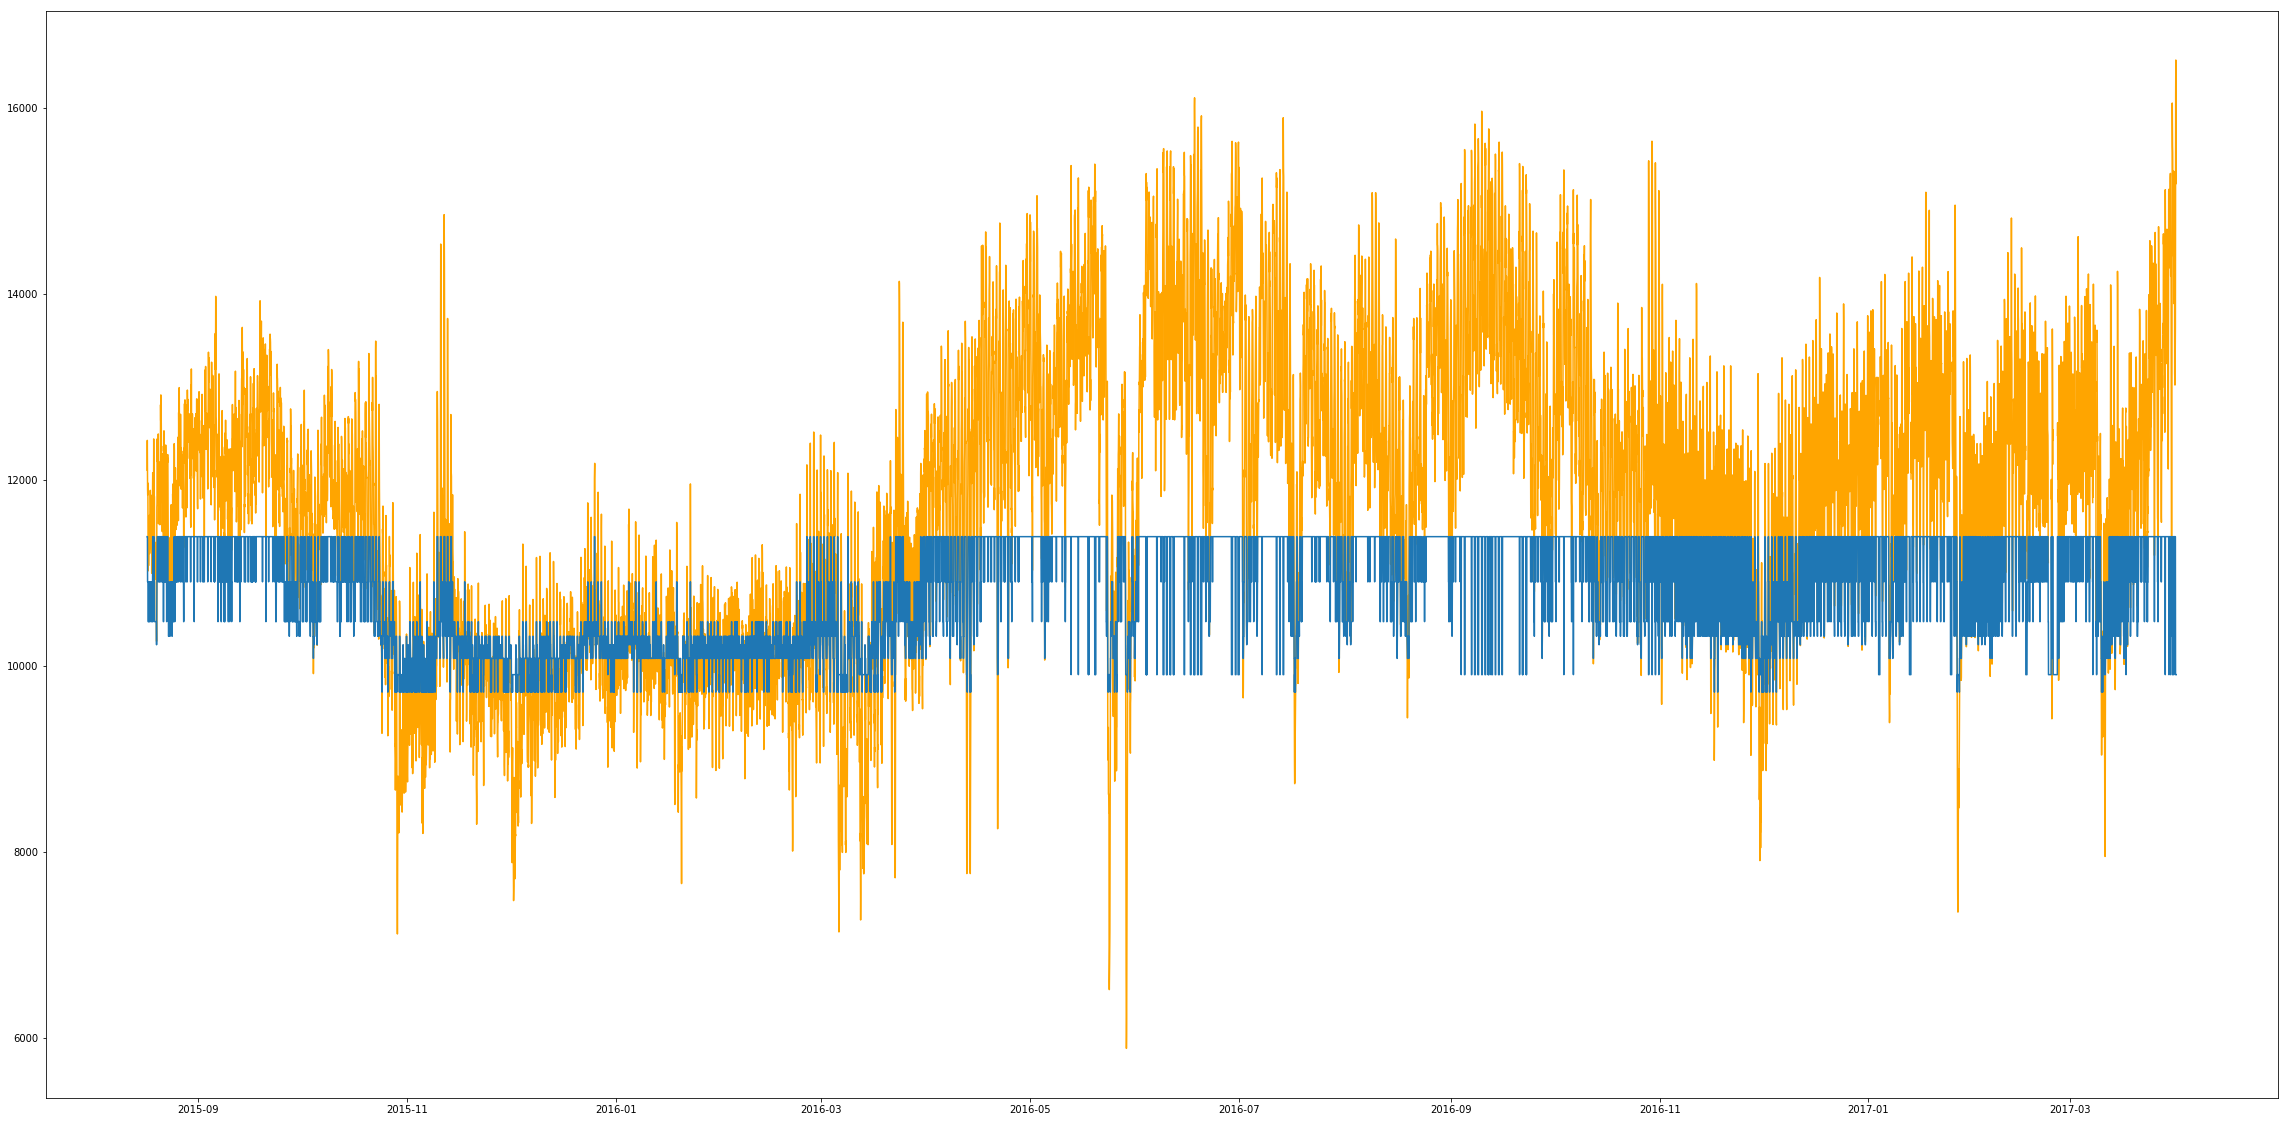

In [18]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[40,20])





ax.plot(X2,data2,c = "orange",label="Original data")
ax.plot(X2,forecasts, label="Forecasts")

#legend(handles=[orig, pred])

In [19]:
from pyFTS.benchmarks import Measures as m


In [20]:
m.mape(data2,forecasts)

8.80572208511782

In [14]:
from pyFTS.partitioners import CMeans, Grid, FCM, Huarng, Entropy, Util as pUtil
from pyFTS.common import Membership as mf
from pyFTS.benchmarks import benchmarks as bchmk

In [27]:
"""
2. Data transformations

In the package pyFTS.common.Transformations several data transformations can be used for the pre-processing and/or post-processing data, which directly impacts the partitioning of the universe of discourse.
"""
from pyFTS.common import Transformations
tdiff = Transformations.Differential(2)

In [31]:
"""
2. Data transformations

In the package pyFTS.common.Transformations several data transformations can be used for the pre-processing and/or post-processing data, which directly impacts the partitioning of the universe of discourse.
"""
from pyFTS.common import Transformations
tdiff = Transformations.Scale(1)

In [35]:
"""
2. Data transformations

In the package pyFTS.common.Transformations several data transformations can be used for the pre-processing and/or post-processing data, which directly impacts the partitioning of the universe of discourse.
"""
from pyFTS.common import Transformations
tdiff = Transformations.BoxCox(1)

In [11]:
part = pUtil.explore_partitioners(data, 8, methods=[Grid.GridPartitioner], 
                                  mf=[mf.trimf, mf.trapmf, mf.gaussmf])


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


FileNotFoundError: [Errno 2] No such file or directory: 'latex'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fc9793df1e0> (for post_execute):


FileNotFoundError: [Errno 2] No such file or directory: 'latex'

FileNotFoundError: [Errno 2] No such file or directory: 'latex'

<Figure size 864x720 with 3 Axes>